# **Department of Computing**

## **CS 471: Machine Learning (3+1)**

**Class**: BSCS 12  
**Lab 7**: Ensemble Methods


**Instructor**: Dr. Naseer Bajwa  
**Lab Engineer**: Mam Iram Tariq Bhatti

**Submitted by**: Hira Sardar-420258-BSCS-12(C)

#**Bagging: Random Forests**

#Importing Libraries

In [77]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Loading the dataset

In [ ]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Bagging Classifier with Decision Trees
bagging_model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100,
random_state=42, max_samples=0.8, max_features=0.8)

#Training the Model and Making Predictions

In [ ]:
# Train the model
bagging_model.fit(X_train, y_train)
# Make predictions
y_pred = bagging_model.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Bagging Model: {accuracy * 100:.2f}%")

Accuracy of Bagging Model: 96.49%


# **Building Random Forests in Python**

# Importing Required Libraries

In [78]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Loading and Exploring the Dataset

In [ ]:
# Load the dataset
data = load_breast_cancer()
# Convert to DataFrame for better exploration
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
# Explore the dataset
print(df.head())
print(df['target'].value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

#Splitting into Training and Testing Sets

In [ ]:
# Split the dataset into training and testing sets
X = df.drop(columns='target') # Features
y = df['target'] # Target
# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (455, 30)
Testing data shape: (114, 30)


#Building the Random Forest Classifier


In [ ]:
# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#Making Predictions and Evaluating the Model


Accuracy: 96.49%
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



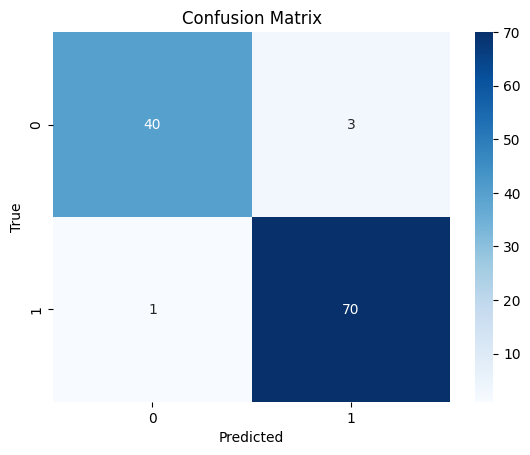

In [ ]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Print classification report
print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance

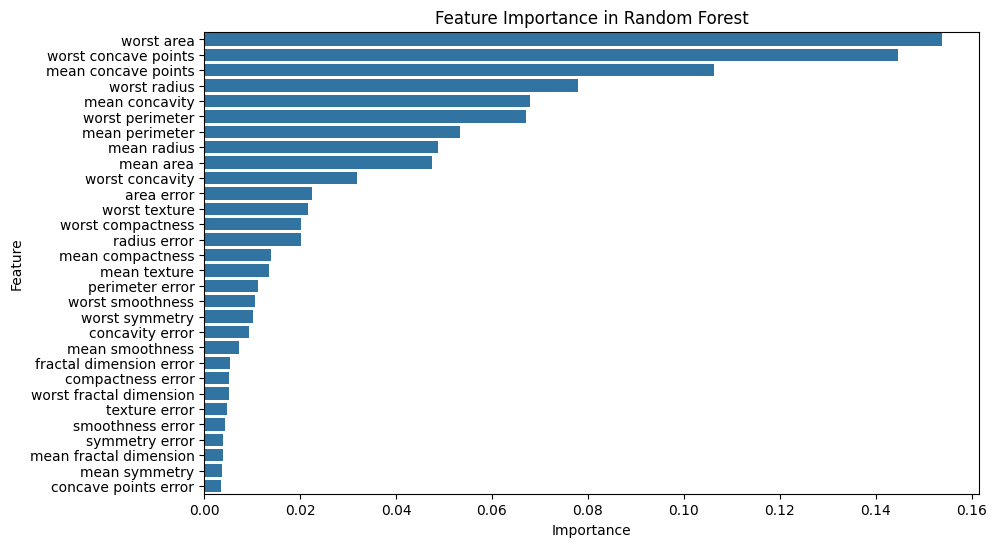

In [ ]:
# Get feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance':
importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance',
ascending=False)
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()


#Hyperparameter Tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Define the model
clf = RandomForestClassifier(random_state=42)
# Define the hyperparameters and their possible values
param_grid = {
 'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]
}
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, verbose=2,
n_jobs=-1)
# Fit the model to data
grid_search.fit(X_train, y_train)
# Best parameters found
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


#**Boosting: AdaBoost**

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train an AdaBoost Classifier with Decision Trees as base learners
ada_clf = AdaBoostClassifier(
 estimator=DecisionTreeClassifier(max_depth=1), # Using shallow trees (weak learners)
 n_estimators=100, # Number of weak learners
 learning_rate=0.1, # Learning rate for updating weights
 random_state=42
)
ada_clf.fit(X_train, y_train)
# Make predictions
y_pred = ada_clf.predict(X_test)
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of AdaBoost Model: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy of AdaBoost Model: 96.67%


#**Mini Challenge**

In [3]:
pip install ucimlrepo

In [4]:
import time
from ucimlrepo import fetch_ucirepo

# Try to fetch the dataset with retries
max_retries = 3
retry_delay = 5  # Seconds
for i in range(max_retries):
    try:
        mushroom = fetch_ucirepo(id=73)
        break  # Exit the loop if successful
    except ConnectionError:
        if i < max_retries - 1:
            print(f"Connection error. Retrying in {retry_delay} seconds...")
            time.sleep(retry_delay)
        else:
            raise  # Raise the error if all retries fail

# Continue with the rest of your code
X = mushroom.data.features
y = mushroom.data.targets
# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [5]:
# Now, access the data and call head():
# *Access features and target and create a DataFrame:*
df_mushroom = pd.DataFrame(data=mushroom.data.features, columns=mushroom.data.features.columns)
df_mushroom['class'] = mushroom.data.targets.iloc[:, 0]  # Add target column

# Now you can call head():
df_mushroom.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


#Exploratory Data Analysis

In [6]:
print(df_mushroom.head())

  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-color-above-ring  \
0         n          k           e  ...                      w   
1         b          k           e  ...                      w   
2         b          n           e  ...                      w   
3         n          n           e  ...                      w   
4         b          k           t  ...                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p          w           o

In [7]:
print(df_mushroom.nunique() )

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
class                        2
dtype: int64


In [8]:
print(df_mushroom.value_counts())

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  spore-print-color  population  habitat  class
b          g            w          t        n     f                w             n          w           e            b           s                         s                         w                       w                       p          w           o            p          w                  c           l        p        1
x          f            y          f        f     f                c             b          p           e            b           k                         k                         n                       p                       p          w           o            l          h                  y           g        p        1
                        

In [9]:
# Check for missing values
print(df_mushroom.isnull().sum())

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64


<Axes: xlabel='class'>

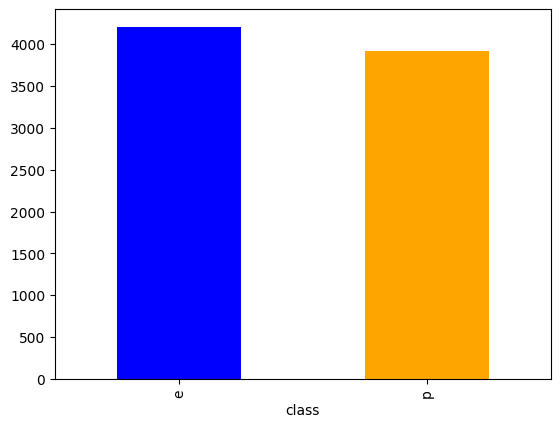

In [10]:

df_mushroom['class'].value_counts().plot(kind='bar', color=['blue', 'orange'])


There is a slight imbalance which will be tackled by using "balanced" as class_weights in dataset.

#**Data Preprocessing**

In [11]:
unique_values = df_mushroom['stalk-root'].unique()
print(unique_values)
# Calculate the mode of the 'stalk-root' column
mode_value = df_mushroom['stalk-root'].mode()[0]

# Fill NaN values with the mode
df_mushroom['stalk-root'].fillna(mode_value, inplace=True)

# Print the unique values to verify
unique_values = df_mushroom['stalk-root'].unique()
print(unique_values)


['e' 'c' 'b' 'r' nan]
['e' 'c' 'b' 'r']


<ipython-input-11-7abf0fb43d8b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mushroom['stalk-root'].fillna(mode_value, inplace=True)


In [12]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through each column in the DataFrame
for column in df_mushroom.columns:
    if df_mushroom[column].dtype == 'object':  # Check if the column is non-numeric
        # Apply LabelEncoder to the column
        df_mushroom[column] = label_encoder.fit_transform(df_mushroom[column])

# Preview the DataFrame
print(df_mushroom.head())


   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7     

In [13]:
print(df_mushroom.head())

   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7     

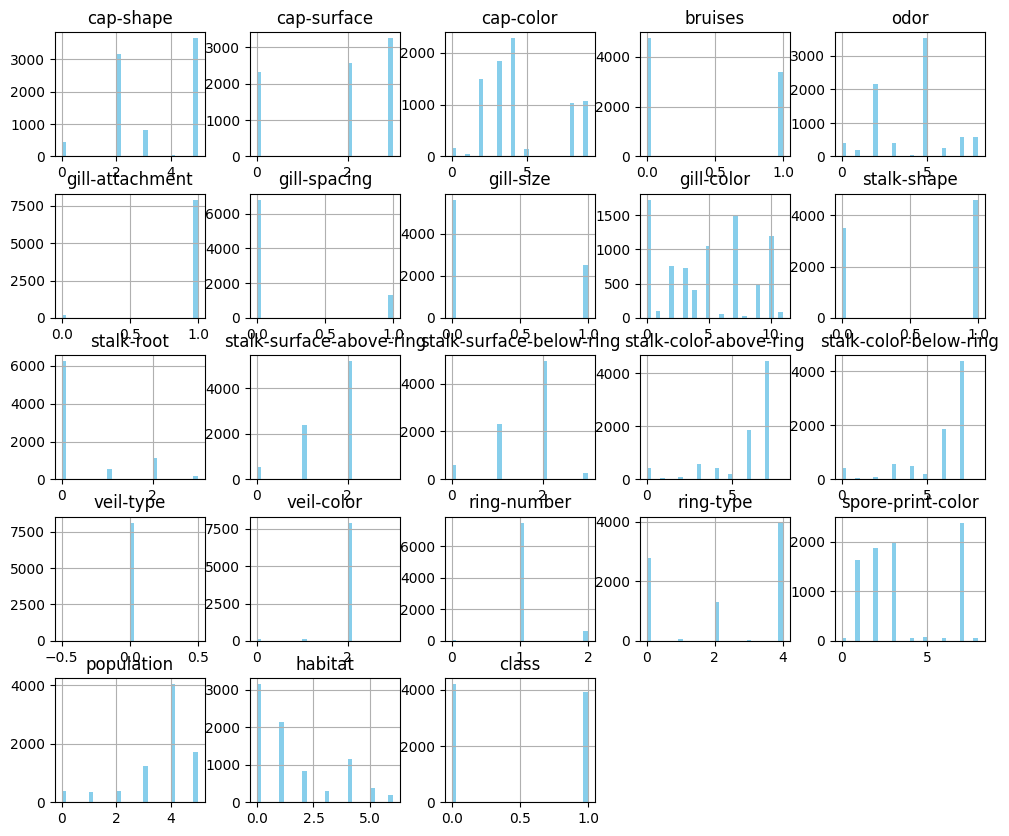

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot histograms of all features
df_mushroom.hist(figsize=(12, 10), bins=30, color='skyblue')
plt.show()

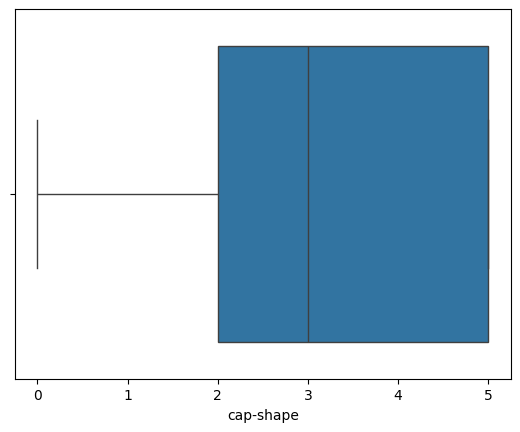

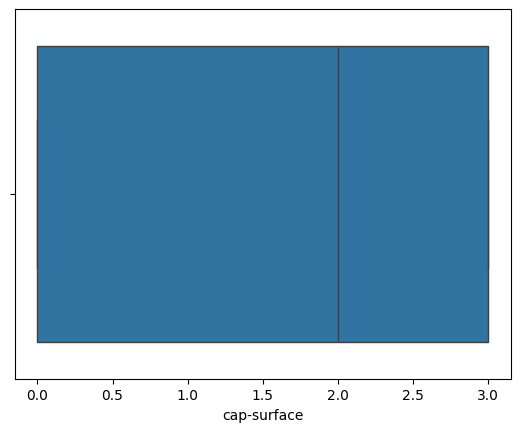

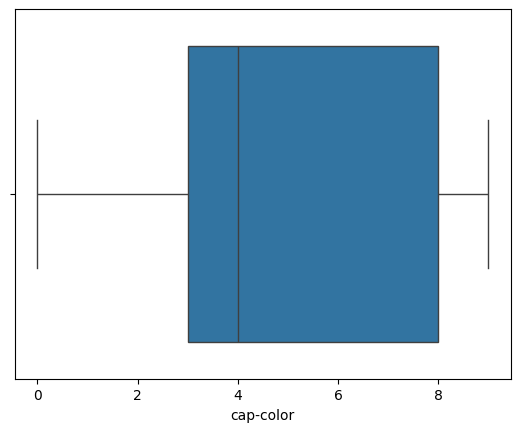

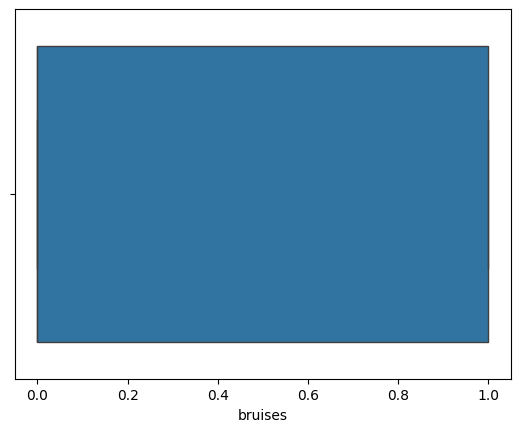

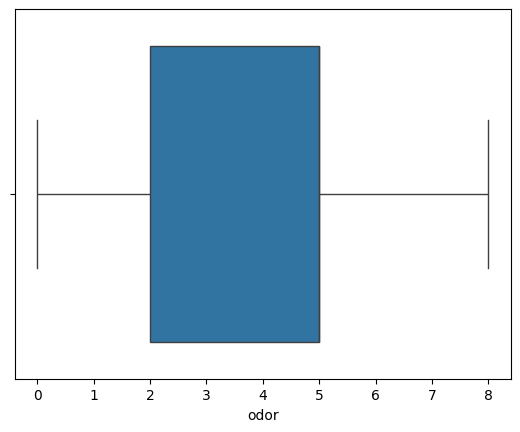

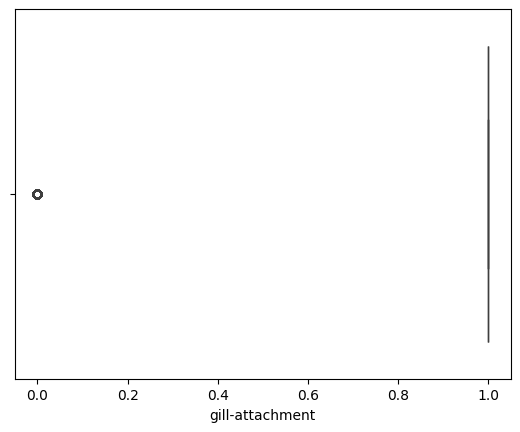

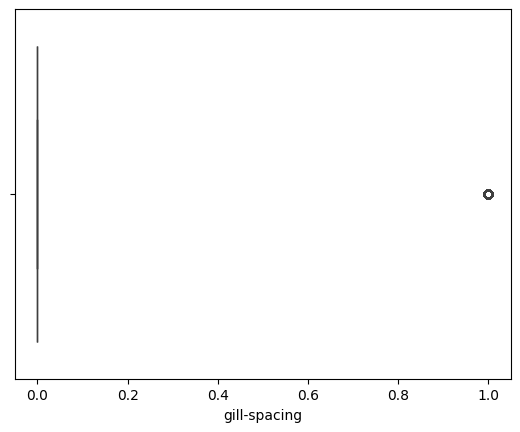

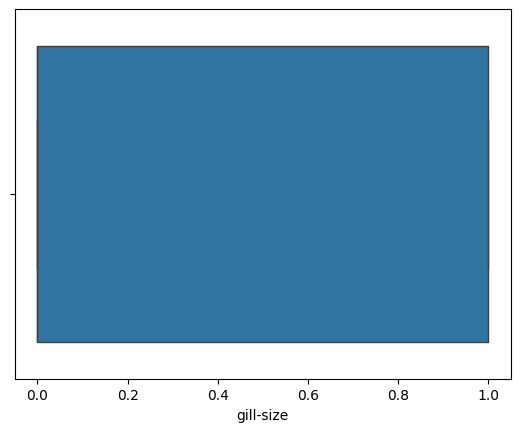

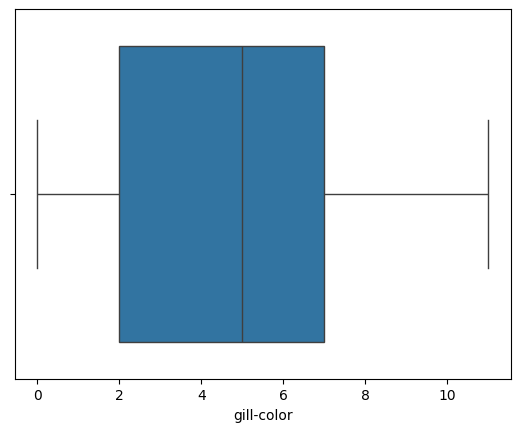

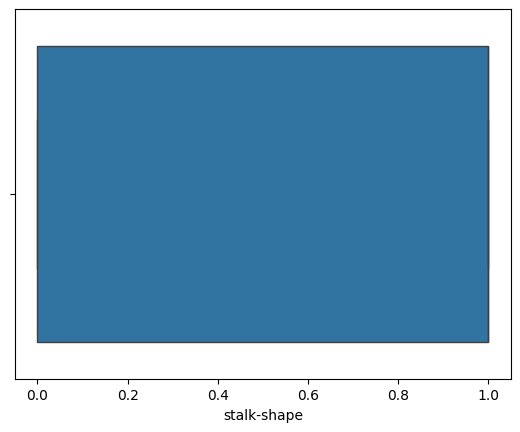

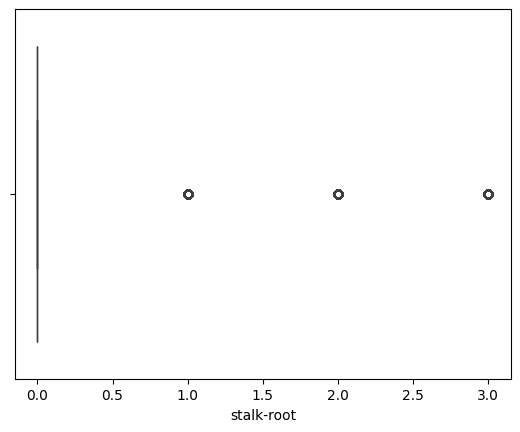

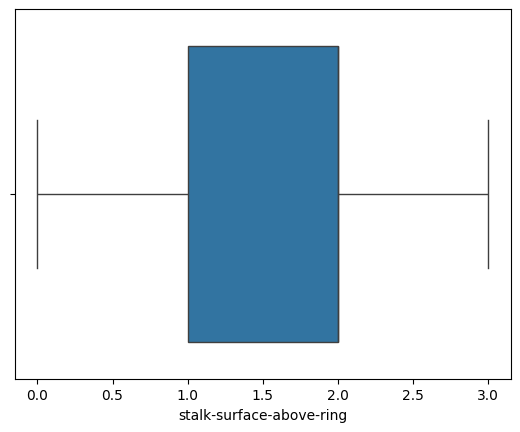

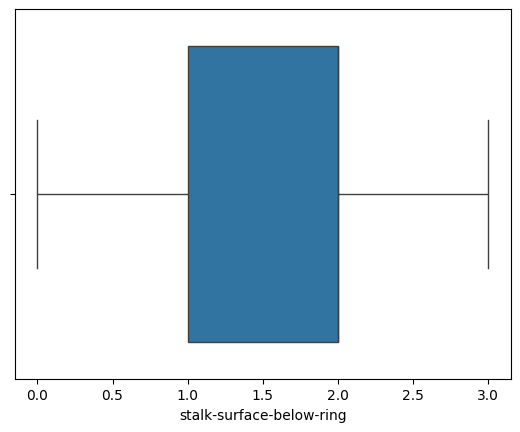

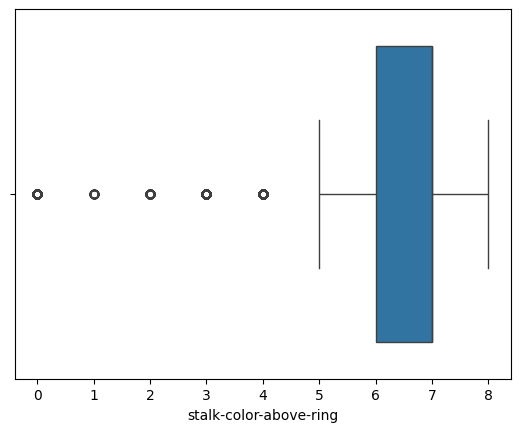

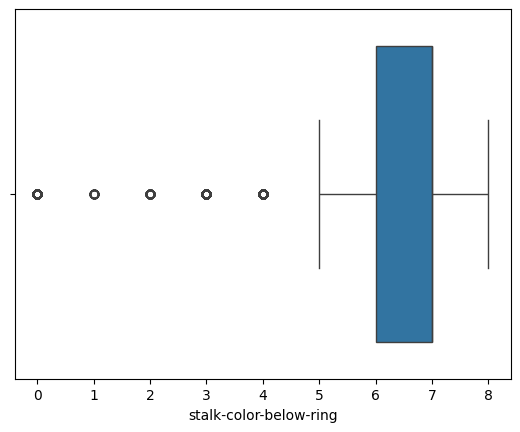

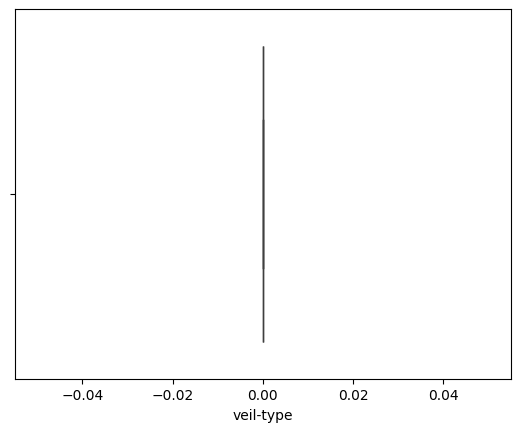

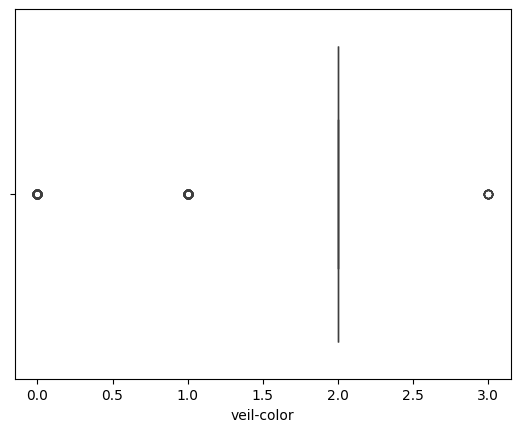

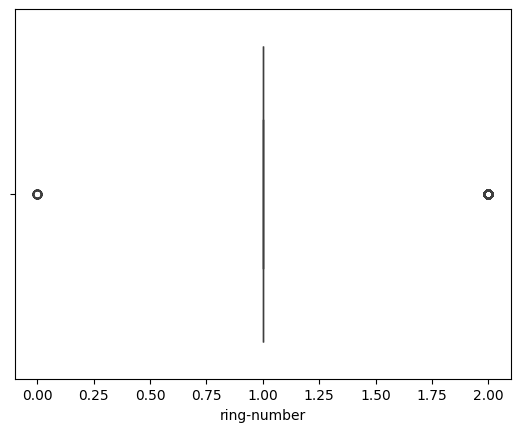

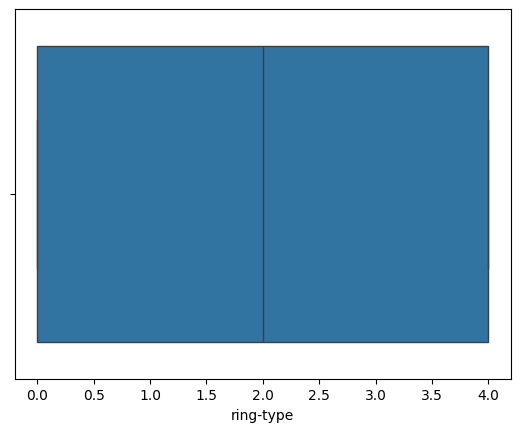

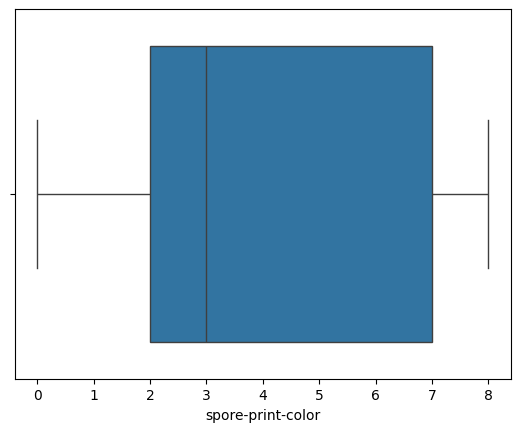

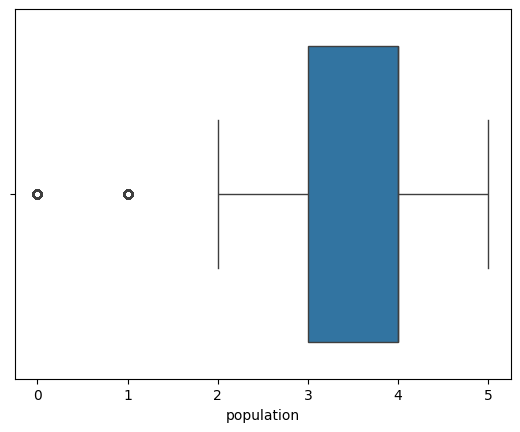

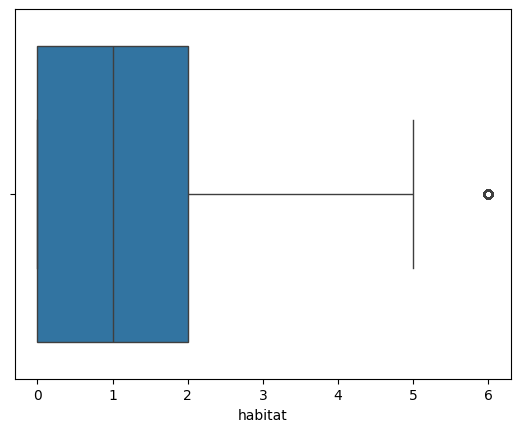

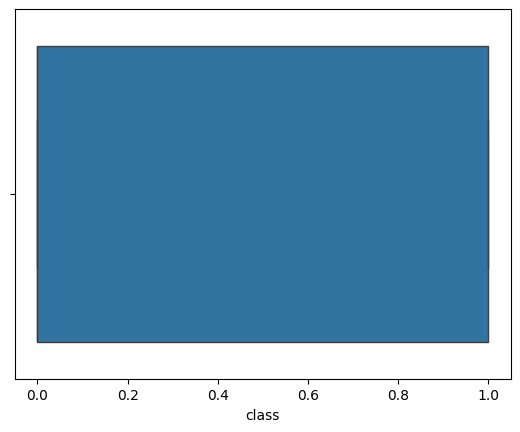

In [15]:
for column in df_mushroom.columns:
  sns.boxplot(x=column, data=df_mushroom)
  plt.show()



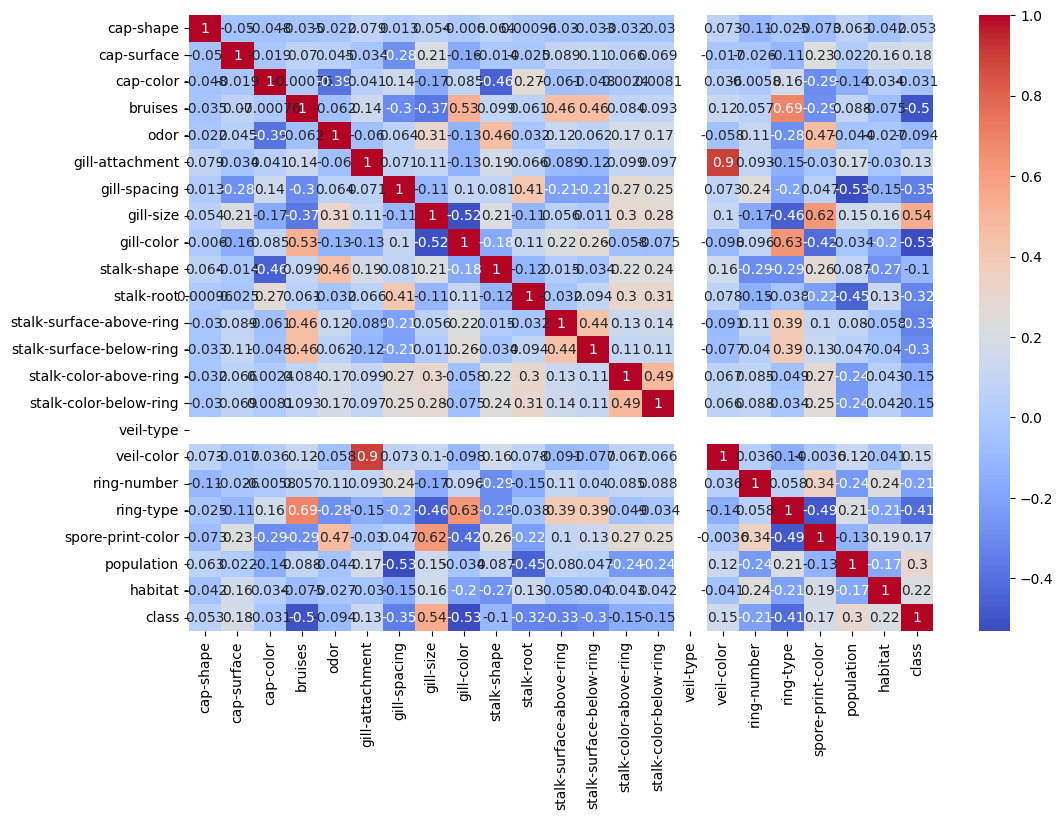

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Generate a correlation matrix
corr_matrix = df_mushroom.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [17]:
df_mushroom.isnull().sum()

,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0
stalk-shape,0


#Making Predictions


In [18]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = df_mushroom.drop(columns='class')  # Features
y = df_mushroom['class']               # Target

# Split into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Print the shape of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3, class_weight='balanced')

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model's performance on the training set
print("Training Set Evaluation:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model's performance on the test set
print("Testing Set Evaluation:")
print(classification_report(y_test, y_test_pred))


Training data shape: (5686, 22)
Testing data shape: (2438, 22)
Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2975
           1       1.00      0.98      0.99      2711

    accuracy                           0.99      5686
   macro avg       0.99      0.99      0.99      5686
weighted avg       0.99      0.99      0.99      5686

Testing Set Evaluation:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1233
           1       0.99      0.97      0.98      1205

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# Define the model
clf = RandomForestClassifier(random_state=42,max_depth=2)
# Define the hyperparameters and their possible values
param_grid = {
 'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]
}
# Set up GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, verbose=2,
n_jobs=-1)
grid_search.fit(X_train, y_train)
# Best parameters found
print(f"Best Parameters: {grid_search.best_params_}")


In [ ]:
# Make predictions on the training and test data
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)

# Evaluate the model's performance on the training set
print("Training Set Evaluation:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model's performance on the test set
print("Testing Set Evaluation:")
print(classification_report(y_test, y_test_pred))

Training Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2975
           1       1.00      1.00      1.00      2711

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686

Testing Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1233
           1       1.00      1.00      1.00      1205

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



#Results:
First of all, I trained my model on Random Forest and test it simply.
The training set accuracy was almost 99% and test set accuracy was 98%. This was because model was overfitting slightly.
#Applying Grid Search:
I then applied Grid Search and then the best parameters are:-
'max_depth': None

*   'min_samples_leaf': 1
*   'min_samples_split': 2
*   'n_estimators': 50

The test set accuracy came out to be 1. In order to confirm, I checked the train accuracy as well. As they both came out as 100, it means the model, due to its complexity and simplicity of dataset, is actually outperforming. 100% accuracy on both test and train sets confirm there is not any kind of overfitting here.

#Question:
**Can you make your Random Forest model prioritize safety (avoiding the poisonous mushrooms) by
improving recall on the poisonous class?**

For this, I am again training model , but with depth reduced and without grid search, so as to have a lesser value of recall I can improve to check the above consideration.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = df_mushroom.drop(columns='class')  # Features
y = df_mushroom['class']               # Target

# Split into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Print the shape of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=2, class_weight='balanced')

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model's performance on the training set
print("Training Set Evaluation:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model's performance on the test set
print("Testing Set Evaluation:")
print(classification_report(y_test, y_test_pred))


Training data shape: (5686, 22)
Testing data shape: (2438, 22)
Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2975
           1       0.97      0.90      0.94      2711

    accuracy                           0.94      5686
   macro avg       0.95      0.94      0.94      5686
weighted avg       0.94      0.94      0.94      5686

Testing Set Evaluation:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1233
           1       0.97      0.89      0.93      1205

    accuracy                           0.93      2438
   macro avg       0.94      0.93      0.93      2438
weighted avg       0.94      0.93      0.93      2438



#Improving Recall:

In [ ]:
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = df_mushroom.drop(columns='class')  # Features
y = df_mushroom['class']               # Target

# Split into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Print the shape of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Create the Random Forest model with a higher class weight for the poisonous class
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=5,                # Adjusted for improved generalization
    min_samples_split=5,        # Adjusted for potentially better recall
    class_weight={0: 1, 1: 2}   # Assuming poisonous class is labeled as 1; higher weight for poisonous
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model's performance on the training set
print("Training Set Evaluation:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model's performance on the test set
print("Testing Set Evaluation:")
print(classification_report(y_test, y_test_pred))


Training data shape: (5686, 22)
Testing data shape: (2438, 22)
Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2975
           1       1.00      0.98      0.99      2711

    accuracy                           0.99      5686
   macro avg       0.99      0.99      0.99      5686
weighted avg       0.99      0.99      0.99      5686

Testing Set Evaluation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1233
           1       1.00      0.98      0.99      1205

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



Recall increased from 0.89 to 0.98.
# Checking if my Random Forest model prioritize safety (avoids the poisonous mushrooms):

False Negative Rate (FNR) for Poisonous Class: 0.00


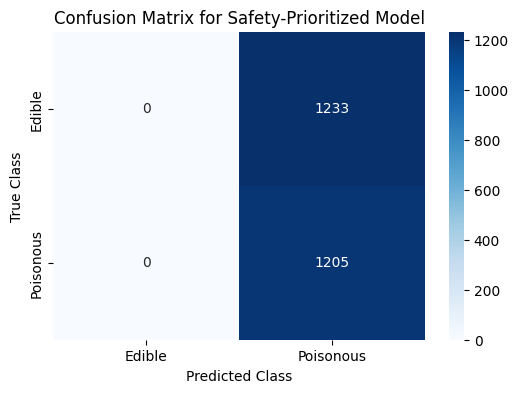

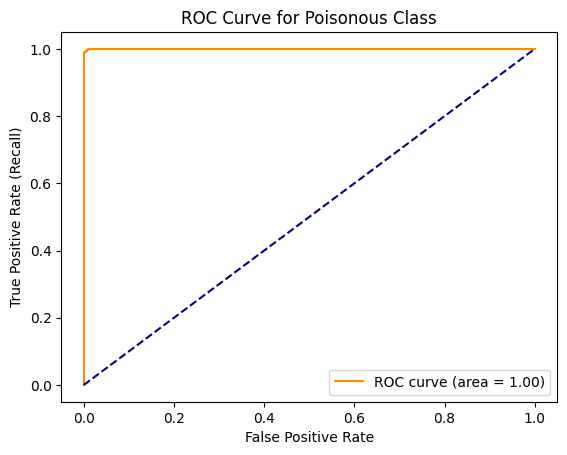

Recall for Poisonous Class: 1.0
Confusion Matrix:
 [[   0 1233]
 [   0 1205]]
AUC for Poisonous Class: 0.9999313484972387


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix for the adjusted predictions
cm = confusion_matrix(y_test, y_test_pred_adjusted)
tn, fp, fn, tp = cm.ravel()

# False Negative Rate
false_negative_rate = fn / (fn + tp)
print(f"False Negative Rate (FNR) for Poisonous Class: {false_negative_rate:.2f}")

# Display confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix for Safety-Prioritized Model")
plt.show()

# ROC curve for the poisonous class
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
auc_score = roc_auc_score(y_test, y_test_prob)
plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Poisonous Class")
plt.legend(loc="lower right")
plt.show()

# Interpretation of Results
print("Recall for Poisonous Class:", recall[1])
print("Confusion Matrix:\n", cm)
print("AUC for Poisonous Class:", auc_score)


#Question#02:
**Use class weights to handle any imbalanced data. Can you create
a new feature (combining features like color and odor) that improves model performance? Analyze
correlations between features and use this to guide your feature selection.
Bonus: Use SHAP (SHapley Additive exPlanations) library to explain individual predictions from your
Random Forest model. Try to figure out why a particular mushroom was classified as poisonous or edible?**

In [79]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = df_mushroom.drop(columns='class')  # Features
y = df_mushroom['class']               # Target

# Split into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

# Print the shape of the training and testing sets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=2, class_weight='balanced')

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model's performance on the training set
print("Training Set Evaluation:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model's performance on the test set
print("Testing Set Evaluation:")
print(classification_report(y_test, y_test_pred))


Training data shape: (5686, 22)
Testing data shape: (2438, 22)
Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2975
           1       0.97      0.90      0.94      2711

    accuracy                           0.94      5686
   macro avg       0.95      0.94      0.94      5686
weighted avg       0.94      0.94      0.94      5686

Testing Set Evaluation:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1233
           1       0.97      0.89      0.93      1205

    accuracy                           0.93      2438
   macro avg       0.94      0.93      0.93      2438
weighted avg       0.94      0.93      0.93      2438



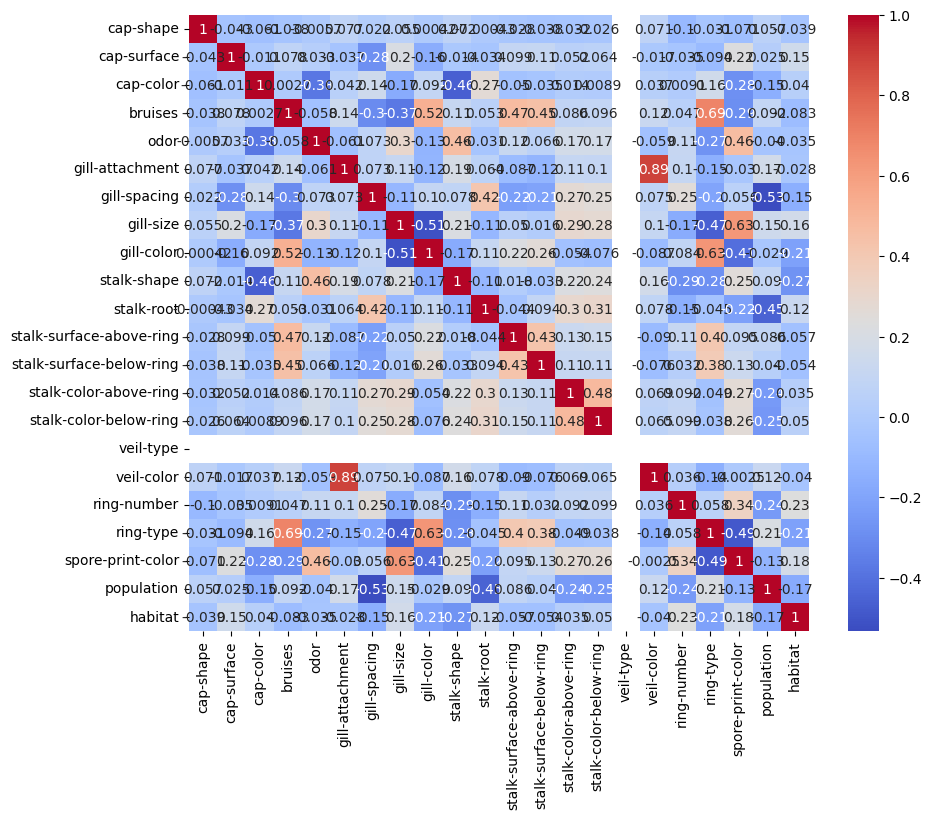

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = X_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()


(5686, 22, 2)
(5686, 22)
shap_values_class shape: (5686, 22)
samples shape: (5686, 22)
shap_values_class shape: (5686, 22)
samples shape: (5686, 22)
Summary plot for class 0


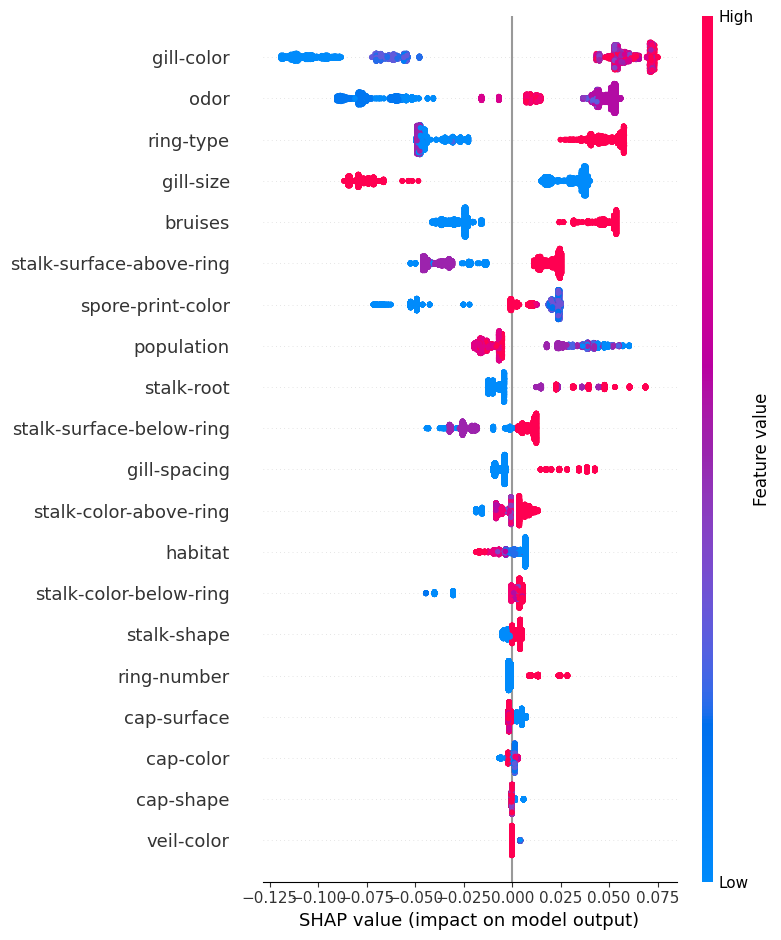

Summary plot for class 1


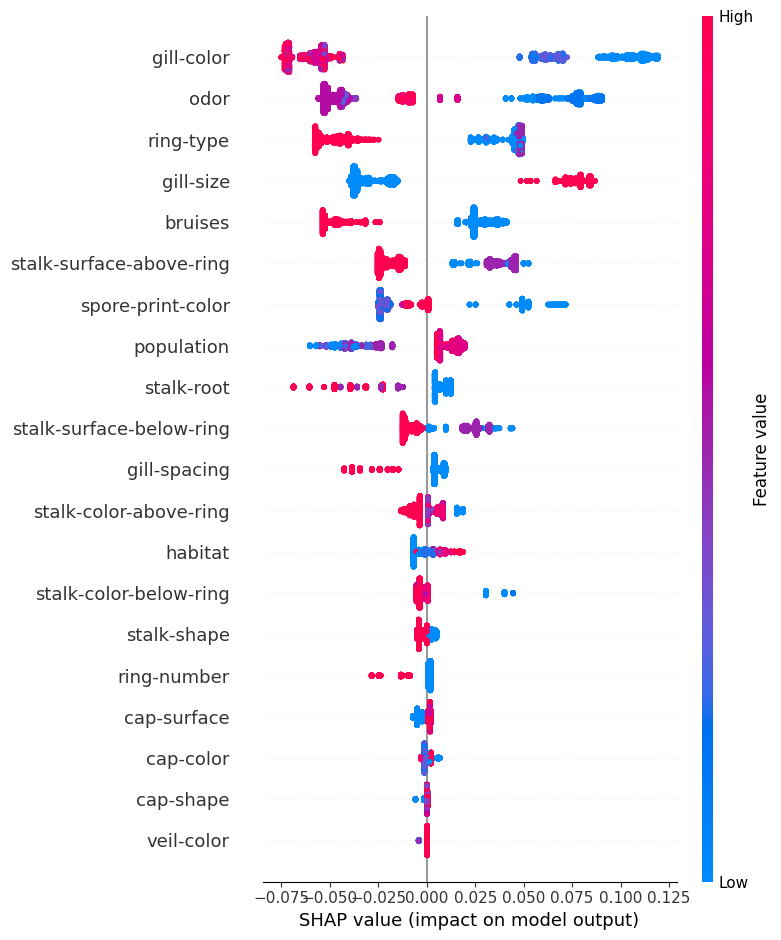

In [39]:
# Import the package
import shap
shap.initjs()

samples = X_train

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(samples, approximate=False, check_additivity=False)
print(shap_values.shape)
print(samples.shape)

for class_index in range(shap_values.shape[2]):
    shap_values_class = shap_values[:, :, class_index]
    print(f"shap_values_class shape: {shap_values_class.shape}")
    print(f"samples shape: {samples.shape}")


for class_index in range(shap_values.shape[2]):  # iterate over classes
    print(f"Summary plot for class {class_index}")
    shap.summary_plot(shap_values[:, :, class_index], samples)


#For class 1:
Features pushing the prediction towards "poisonous" will be on the right side, while those pushing it towards "edible" will be on the left.
Each feature’s arrow length represents its influence: a longer arrow means that feature has a greater impact on the prediction.
If the sum of feature contributions plus the expected value (baseline) results in a high prediction score for "poisonous," the model is confident that the mushroom is poisonous.

Using correlation matrix and SHAP to decide which features to retain and which to drop.

In [73]:
features_to_drop = []
features_to_drop.append('gill-attachment')
features_to_drop.append('veil-color')
X_train = X_train.drop(features_to_drop, axis=1)
X_test = X_test.drop(features_to_drop, axis=1)

In [74]:
print(X_train.head())

      cap-shape  cap-surface  cap-color  bruises  odor  gill-spacing  \
2620          2            0          4        1     5             0   
3139          2            3          3        1     5             0   
5604          3            3          5        1     5             0   
6626          5            2          4        0     8             0   
7131          3            2          2        0     8             0   

      gill-size  gill-color  stalk-shape  stalk-root  \
2620          0           9            1           0   
3139          0           9            1           0   
5604          0           1            0           0   
6626          1           0            1           0   
7131          1           0            1           0   

      stalk-surface-above-ring  stalk-surface-below-ring  \
2620                         2                         2   
3139                         2                         2   
5604                         2                    

In [80]:
X_train['color_odor'] = X_train['gill-color'].astype(str) + '_' + X_train['odor'].astype(str)
X_test['color_odor'] = X_test['gill-color'].astype(str) + '_' + X_test['odor'].astype(str)
X_train['color_odor'] = X_train['gill-size'].astype(str) + '_' + X_train['ring-type'].astype(str)
X_test['color_odor'] = X_test['gill-size'].astype(str) + '_' + X_test['ring-type'].astype(str)

In [81]:
# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,max_depth=2, class_weight='balanced')

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model's performance on the training set
print("Training Set Evaluation:")
print(classification_report(y_train, y_train_pred))

# Evaluate the model's performance on the test set
print("Testing Set Evaluation:")
print(classification_report(y_test, y_test_pred))

Training Set Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2975
           1       0.97      0.95      0.96      2711

    accuracy                           0.96      5686
   macro avg       0.96      0.96      0.96      5686
weighted avg       0.96      0.96      0.96      5686

Testing Set Evaluation:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1233
           1       0.97      0.95      0.96      1205

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



By doing feature selection, model's performance improved from 93% to 96%.
Note: I reduced max_depth to decrease model's performance intentionally so as to show impact of feature selection clearly.